# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

# Import Data

In [2]:
# Import Data
restaurant_all = pd.read_csv(r"D:\Tony\Programming\Datasets\Yelp\yelp_restaurant.csv", encoding='utf-8')
restaurant = pd.read_csv(r"D:\Tony\Programming\Datasets\Yelp\yelp_restaurant_2019.csv", encoding='utf-8')
reviews = pd.read_csv(r"D:\Tony\Programming\Datasets\Yelp\yelp_reviews_2018.csv", encoding='utf-8')

# Calculate Features

### Transform continuous output to classes

In [3]:
# Create target labels
ppl80 = restaurant['popularity'].quantile(q=0.8)
ppl60 = restaurant['popularity'].quantile(q=0.6)
ppl40 = restaurant['popularity'].quantile(q=0.4)
ppl20 = restaurant['popularity'].quantile(q=0.2)

print(ppl80, ppl60, ppl40, ppl20)

conditions = [
    (restaurant['popularity'] >= ppl80),
    (restaurant['popularity'] < ppl80) & (restaurant['popularity'] >= ppl60),
    (restaurant['popularity'] < ppl60) & (restaurant['popularity'] >= ppl40),
    (restaurant['popularity'] < ppl40) & (restaurant['popularity'] >= ppl20),
    (restaurant['popularity'] < ppl20)
]

choices = [5,4,3,2,1]

restaurant['pop_label'] = np.select(condlist=conditions, choicelist=choices)

2.959556950917159 1.464816384890813 0.4882721282969379 -0.7434447729291692


Text(0.5, 1.0, 'Histogram of Restaurant Popularity')

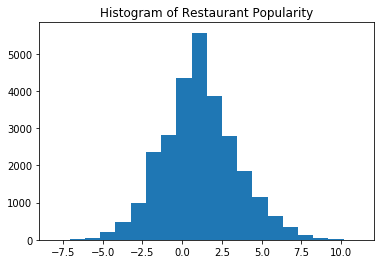

In [21]:
plt.hist(restaurant['popularity'], bins=20)
plt.title("Histogram of Restaurant Popularity")

In [5]:
len(restaurant[restaurant['pop_label'] == 1]), len(restaurant[restaurant['pop_label'] == 2]), \
len(restaurant[restaurant['pop_label'] == 3]), len(restaurant[restaurant['pop_label'] == 4]), \
len(restaurant[restaurant['pop_label'] == 5])

(5537, 5522, 5292, 5778, 5554)

### Calculate city review counts

In [6]:
# Calculate overall city review counts
reviews['count'] = 1
ct = pd.merge(reviews, restaurant_all, how='inner', on=['business_id'])
cities = ct.groupby(['city', 'state']).agg({'count':'sum'})

# Combine calculations with restaurant df
restaurant = pd.merge(restaurant, restaurant_all[['business_id', 'city', 'state']], how='left', on=['business_id'])
restaurant = pd.merge(restaurant, cities, how='left', on=['city', 'state'])

In [7]:
restaurant.shape

(27683, 8)

In [8]:
restaurant.head(3)

,business_id,stars,count_x,popularity,pop_label,city,state,count_y
0,--1UhMGODdWsrMastO9DZw,4.000000,3,1.098612,3,Calgary,AB,7431.0
1,--6MefnULPED_I942VcFNA,1.636364,11,-3.269857,1,Richmond Hill,ON,3153.0
2,--9e1ONYQuAa-CB_Rrw7Tw,4.083333,132,5.289702,5,Las Vegas,NV,201003.0


# Combine Features to One Dataframe

### Combine reviews with restaurants

In [9]:
feature = pd.merge(reviews, restaurant, how='left', on=['business_id']) 

In [10]:
feature.shape

(676136, 14)

In [11]:
feature.head(3)

,business_id,user_id,stars_x,like,text,date,count,stars_y,count_x,popularity,pop_label,city,state,count_y
0,d_q4avZYM1sOlQP7noJKVg,UreiTV1I9i-XF6_bJhK6Iw,4.0,1,always fun outing come great hot dogs fixings ...,2018-04-15 11:13:11,1,2.450000,20.0,-1.647653,1.0,Phoenix,AZ,69200.0
1,ACb637NG7EnswRs8U_BX_w,dZxXGlJtNwr9pag5UXCa4A,5.0,0,travel lots business one funniest places heath...,2018-03-15 20:18:36,1,3.133333,90.0,0.599975,3.0,Tempe,AZ,17812.0
2,kBJfBVaXJtPEKLTov1hJdQ,dZudYQD1T2U5RSJeJWYCLw,5.0,2,i'm arizona reathrey sekong food good authenti...,2018-03-15 19:48:59,1,4.600000,60.0,6.550951,5.0,Phoenix,AZ,69200.0


### Select required columns

In [12]:
feature = feature.iloc[:,[0,1,2,3,4,9,10,-1]]
feature.columns = ['business_id', 'user_id', 'stars', 'like', 'text', 'popularity', 'pop_label', 'city_count']

In [13]:
feature.head(3)

,business_id,user_id,stars,like,text,popularity,pop_label,city_count
0,d_q4avZYM1sOlQP7noJKVg,UreiTV1I9i-XF6_bJhK6Iw,4.0,1,always fun outing come great hot dogs fixings ...,-1.647653,1.0,69200.0
1,ACb637NG7EnswRs8U_BX_w,dZxXGlJtNwr9pag5UXCa4A,5.0,0,travel lots business one funniest places heath...,0.599975,3.0,17812.0
2,kBJfBVaXJtPEKLTov1hJdQ,dZudYQD1T2U5RSJeJWYCLw,5.0,2,i'm arizona reathrey sekong food good authenti...,6.550951,5.0,69200.0


### Remove NAs

In [14]:
feature = feature.dropna().reset_index().drop(columns=['index'])
feature.shape

(660000, 8)

### Add Extra Features

(array([3.32841e+05, 1.92639e+05, 7.45800e+04, 3.12480e+04, 1.39010e+04,
        6.72000e+03, 3.44100e+03, 1.79000e+03, 1.01600e+03, 6.46000e+02,
        4.26000e+02, 2.96000e+02, 1.82000e+02, 1.82000e+02, 6.70000e+01,
        1.90000e+01, 3.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([  1.  ,  34.95,  68.9 , 102.85, 136.8 , 170.75, 204.7 , 238.65,
        272.6 , 306.55, 340.5 , 374.45, 408.4 , 442.35, 476.3 , 510.25,
        544.2 , 578.15, 612.1 , 646.05, 680.  ]),
 <a list of 20 Patch objects>)

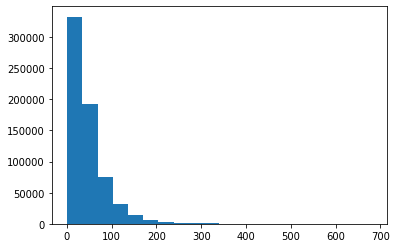

In [15]:
# Length of texts
feature['text_len'] = feature['text'].str.split().str.len()

# Text_len distribution
plt.hist(feature['text_len'], bins=20)

In [16]:
# Calculate restuarant-wide average stars and number of reviews in 2018
feature['count'] = 1
res_feature = feature.groupby(['business_id']) \
                .agg({'stars':'mean', 'count':'sum'}) \
                .rename(columns={'stars':'avg_stars', 'count':'review_count'})

# Merge features
feature = pd.merge(feature, res_feature[['avg_stars', 'review_count']], how='left', on=['business_id'])
feature = feature.drop(columns=['count'])

In [17]:
feature.head(3)

,business_id,user_id,stars,like,text,popularity,pop_label,city_count,text_len,avg_stars,review_count
0,d_q4avZYM1sOlQP7noJKVg,UreiTV1I9i-XF6_bJhK6Iw,4.0,1,always fun outing come great hot dogs fixings ...,-1.647653,1.0,69200.0,17,3.514286,35
1,ACb637NG7EnswRs8U_BX_w,dZxXGlJtNwr9pag5UXCa4A,5.0,0,travel lots business one funniest places heath...,0.599975,3.0,17812.0,14,3.817391,115
2,kBJfBVaXJtPEKLTov1hJdQ,dZudYQD1T2U5RSJeJWYCLw,5.0,2,i'm arizona reathrey sekong food good authenti...,6.550951,5.0,69200.0,12,4.418182,55


In [18]:
# Label distribtion
len(feature[feature['pop_label'] == 1]), len(feature[feature['pop_label'] == 2]), len(feature[feature['pop_label'] == 3]), \
len(feature[feature['pop_label'] == 4]), len(feature[feature['pop_label'] == 5])

(67911, 56912, 63962, 112812, 358403)

# Export Features

In [19]:
feature.to_csv(r'D:\Tony\Programming\Datasets\Yelp\yelp_feature.csv', index=False, encoding='utf-8')